In [3]:
import numpy as np
import random
import itertools
import Levenshtein
import difflib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from simulation import StringGenerator, plot_simulation

In [4]:
# Simulation

sets = [
    {'a','b','c','d'},
    {'c','d','e','f'},
    {'e','f','a','b'}
]

sg = StringGenerator(symbol_sets=sets, len_seq=4)
simulator = sg.Simulator(sg)
simulator.run_simulation()

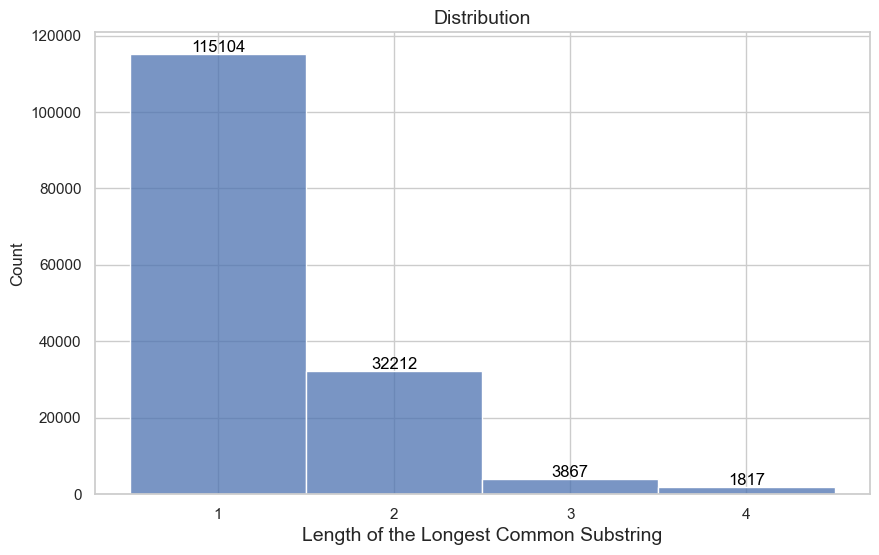

In [5]:
plot_simulation(simulator.lcs_lengths, 'LCS')